10. SVM model with preprocessing for the Gender classification dataset	

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('gender_classification_v7.csv')
df

,ID,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,1,11.8,6.1,1,0.0,1,1,Male
1,2,0,14.0,5.4,0,0.0,1,0,Female
2,3,0,11.8,6.3,1,1.0,1,1,Male
3,4,0,14.4,6.1,0,1.0,1,1,Male
4,5,1,13.5,5.9,0,0.0,0,0,Female
...,...,...,...,...,...,...,...,...,...
4996,4997,1,13.6,5.1,0,0.0,0,0,Female
4997,4998,1,11.9,5.4,0,0.0,0,0,Female
4998,4999,1,12.9,5.7,0,0.0,0,0,Female
4999,5000,1,13.2,6.2,0,0.0,0,0,Female


In [3]:
num_col=df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_col=df.select_dtypes(include=['object']).columns.tolist()

for col in num_col:
    df[col].fillna(df[col].mode()[0],inplace=True)
for col in cat_col:
    df[col].fillna(df[col].mode()[0],inplace=True)
df

C:\Users\mithu\AppData\Local\Temp\ipykernel_13380\2805037782.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
C:\Users\mithu\AppData\Local\Temp\ipykernel_13380\2805037782.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,ID,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,1,11.8,6.1,1,0.0,1,1,Male
1,2,0,14.0,5.4,0,0.0,1,0,Female
2,3,0,11.8,6.3,1,1.0,1,1,Male
3,4,0,14.4,6.1,0,1.0,1,1,Male
4,5,1,13.5,5.9,0,0.0,0,0,Female
...,...,...,...,...,...,...,...,...,...
4996,4997,1,13.6,5.1,0,0.0,0,0,Female
4997,4998,1,11.9,5.4,0,0.0,0,0,Female
4998,4999,1,12.9,5.7,0,0.0,0,0,Female
4999,5000,1,13.2,6.2,0,0.0,0,0,Female


In [5]:
df.isnull().sum()

ID                           0
long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [6]:
#Encode the categorical target variable
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Female=0, Male=1
df

,ID,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,1,11.8,6.1,1,0.0,1,1,1
1,2,0,14.0,5.4,0,0.0,1,0,0
2,3,0,11.8,6.3,1,1.0,1,1,1
3,4,0,14.4,6.1,0,1.0,1,1,1
4,5,1,13.5,5.9,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
4996,4997,1,13.6,5.1,0,0.0,0,0,0
4997,4998,1,11.9,5.4,0,0.0,0,0,0
4998,4999,1,12.9,5.7,0,0.0,0,0,0
4999,5000,1,13.2,6.2,0,0.0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('gender', axis=1)
Y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3)

In [12]:
print(X.shape,Y.shape)

(5001, 8) (5001,)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.svm import SVC

In [18]:
#Train SVM model
model = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.
model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], shape=(1501,))

In [21]:
comparison_df=pd.DataFrame(
    {
        'Actual':y_test,
        'Predicted':y_pred
    }
)
comparison_df

,Actual,Predicted
347,0,0
2392,0,0
3391,0,0
3532,0,0
3835,0,0
...,...,...
1744,0,0
578,1,1
1965,1,1
3277,0,0


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[703  32]
 [ 30 736]]


In [24]:
from sklearn.metrics import classification_report

In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       735
        Male       0.96      0.96      0.96       766

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

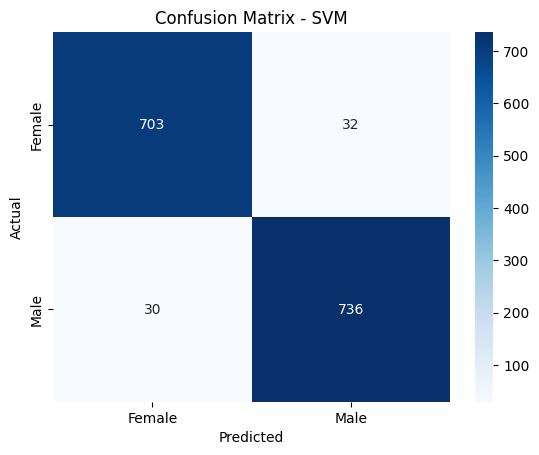

In [27]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()